In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

In [3]:
# Load your dataset
data = pd.read_csv('Jac_Training_data.csv')
data = data.rename(columns={'Enzyme_Sim': 'Temp', 'Carrier_Sim': 'Enzyme_Sim'})
data = data.rename(columns={'Temp': 'Carrier_Sim'})

# Assuming your dataset has features and a target column
X = data[['Carrier_Sim', 'Transporter_Sim', 'Enzyme_Sim', 'Target_Sim', 'SE_Sim', 'Off_Sim', 'Chemsub_Sim']]
y = data['Label']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Train a RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.7216992373689228


In [5]:
# Compute permutation importance
r = permutation_importance(model, X_val, y_val, n_repeats=30, random_state=0)

# Display the results
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X.columns[i]:<15} {r.importances_mean[i]:.3f} +/- {r.importances_std[i]:.3f}")

Off_Sim         0.074 +/- 0.002
SE_Sim          0.070 +/- 0.002
Carrier_Sim     0.050 +/- 0.001
Chemsub_Sim     0.045 +/- 0.002
Transporter_Sim 0.015 +/- 0.001
Target_Sim      0.008 +/- 0.000
Enzyme_Sim      0.007 +/- 0.001


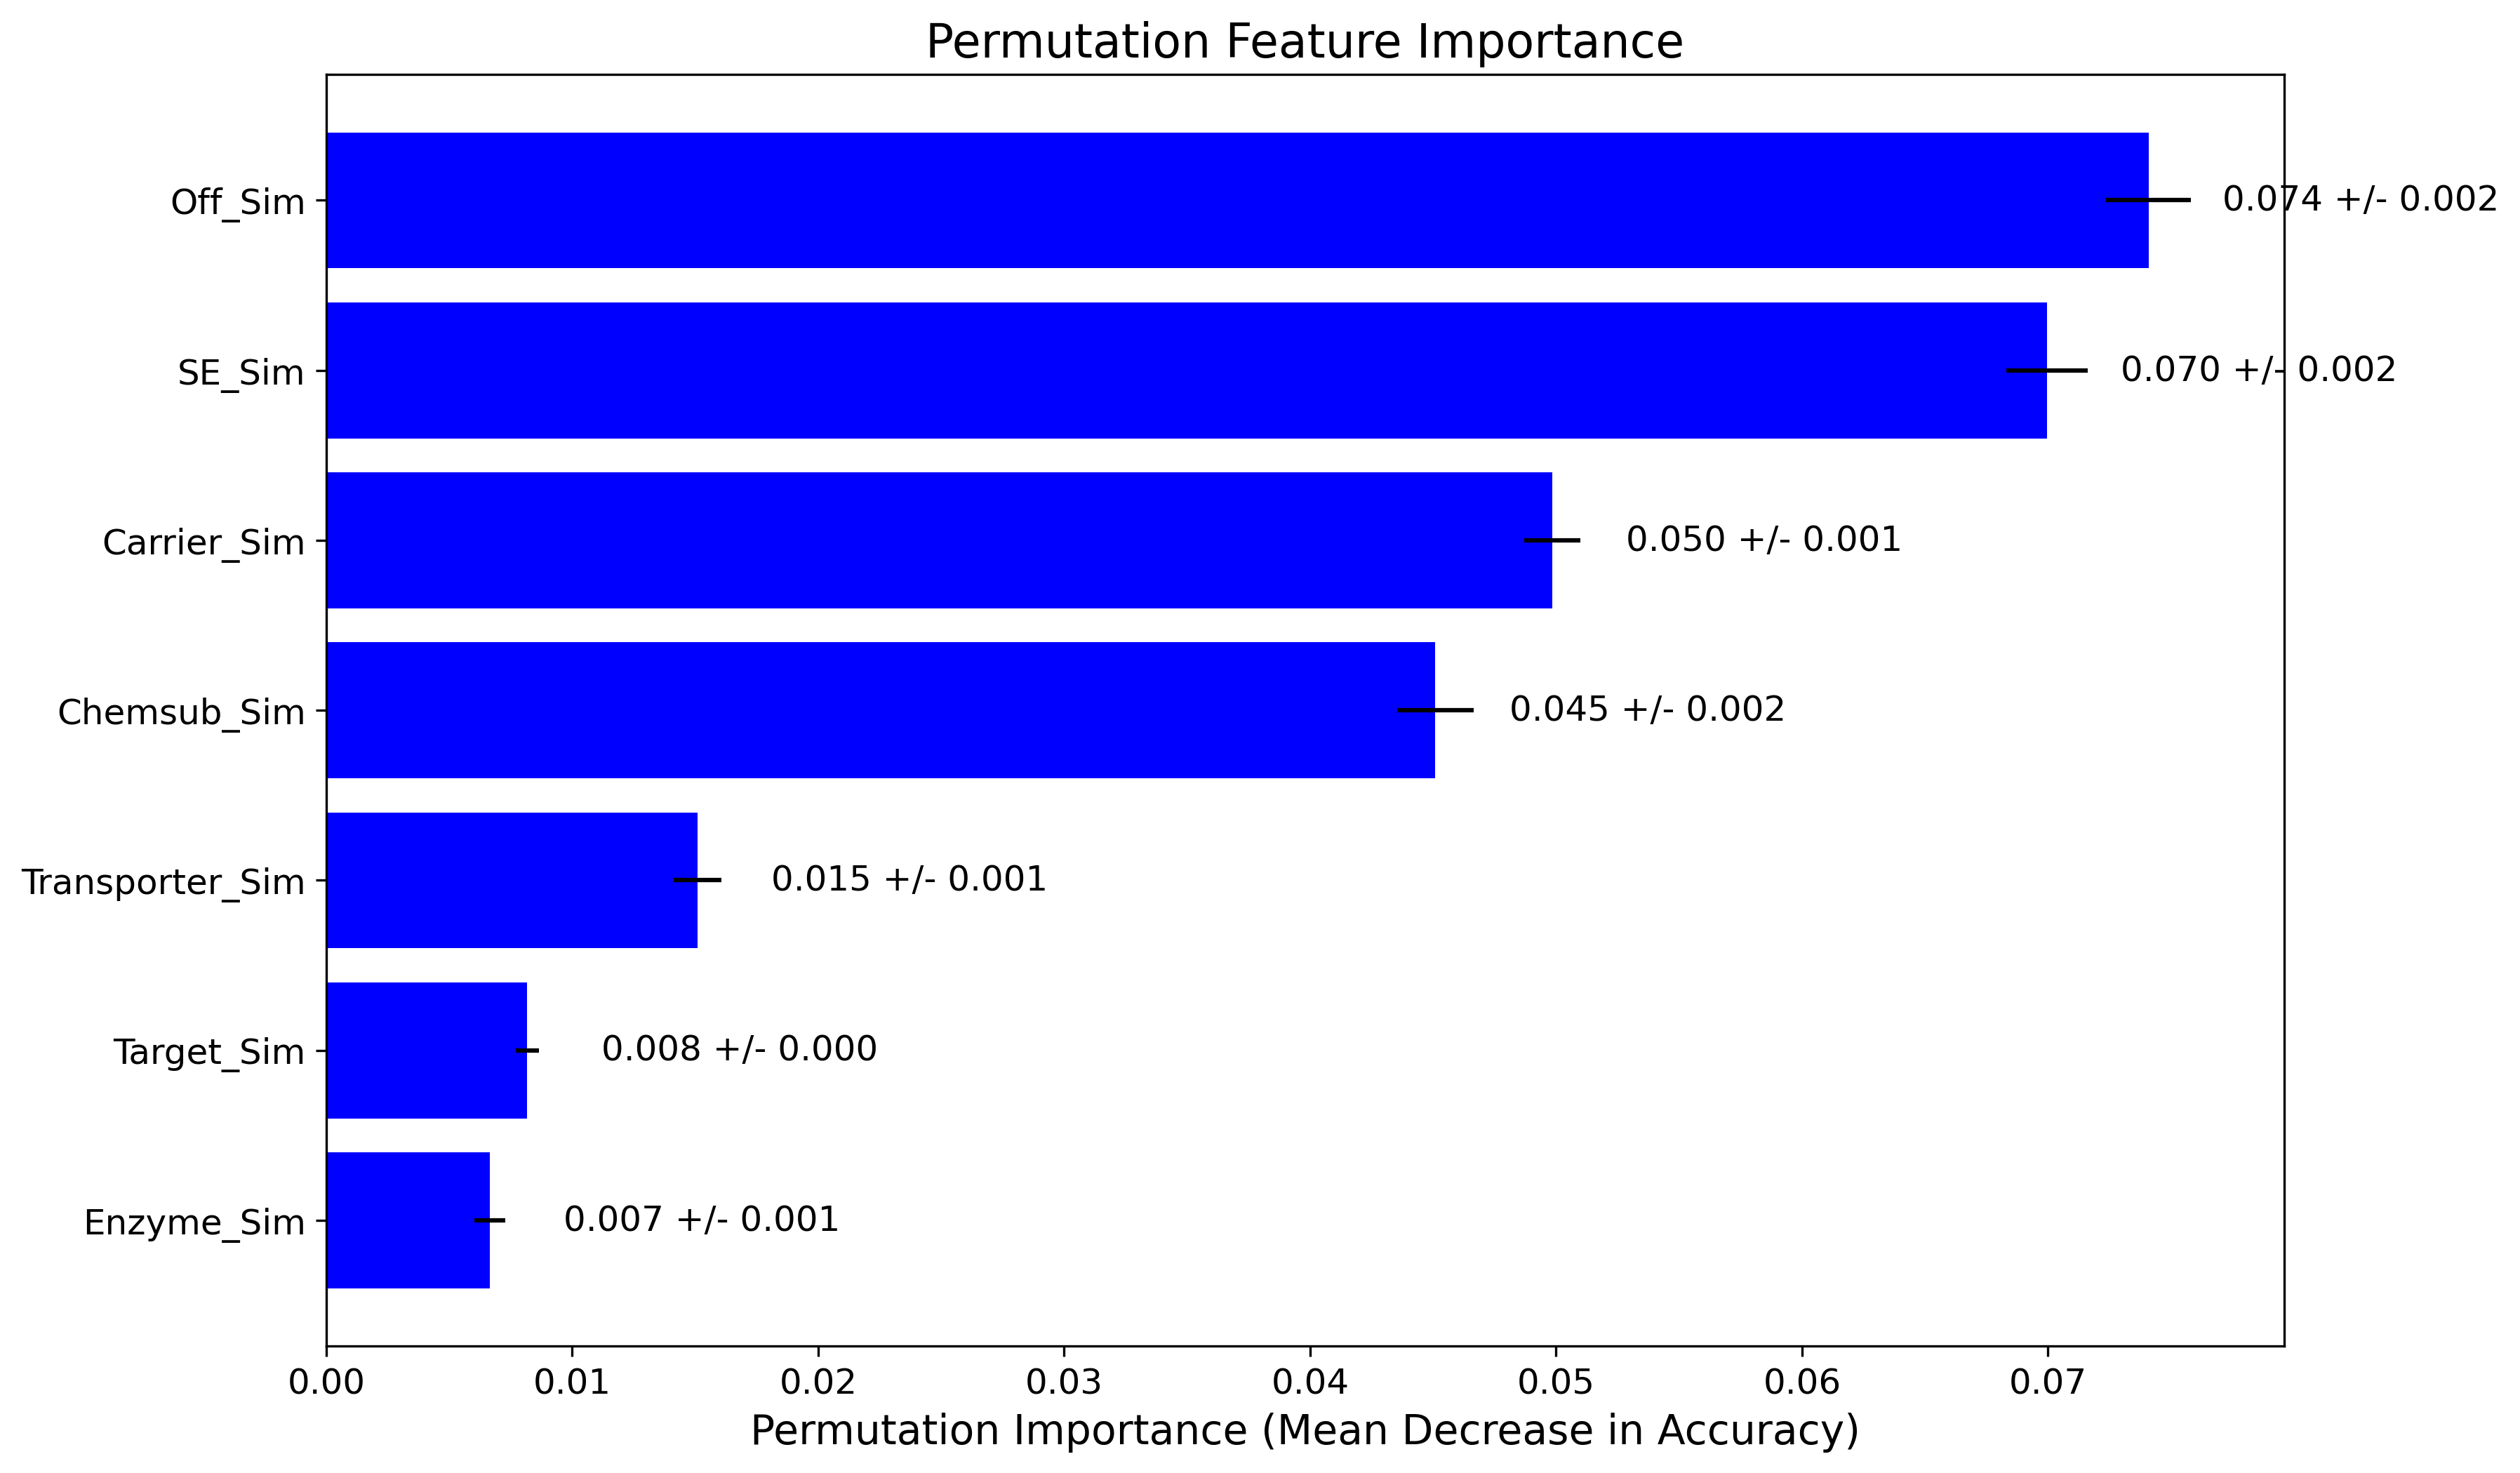

In [26]:
# Plot the permutation importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8), dpi=300)  # Increased figure size and resolution
sorted_idx = r.importances_mean.argsort()

plt.barh(X.columns[sorted_idx], r.importances_mean[sorted_idx], xerr=r.importances_std[sorted_idx], color='blue')
plt.xlabel('Permutation Importance (Mean Decrease in Accuracy)', fontsize=14)
plt.title('Permutation Feature Importance', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate the bars with the mean and std deviation SHAP values
for i, v in enumerate(r.importances_mean[sorted_idx]):
    plt.text(v + 0.003, i, f'{v:.3f} +/- {r.importances_std[sorted_idx][i]:.3f}', va='center', fontsize=12, color='black')

# Save the plot as a high-resolution image
plt.savefig('permutation_importance_hd.jpeg', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()